In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file
from scipy import stats
import random

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
# Code to supress warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [7]:
#Read the csv file


takehome_users = pd.read_csv('../raw_data/takehome_users.csv', encoding='latin-1')
takehome_user_engagement = pd.read_csv('../raw_data/takehome_user_engagement.csv', encoding='latin-1')


In [195]:
takehome_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [11]:
takehome_user_engagement.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [13]:
takehome_users.shape

(12000, 10)

In [15]:
takehome_user_engagement.shape

(207917, 3)

In [17]:

unique_invite_sums = takehome_users['invited_by_user_id'].value_counts()
print(unique_invite_sums)

invited_by_user_id
10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: count, Length: 2564, dtype: int64


Text(0.5, 1.0, 'Histogram of Number of Users Invited by each Unique User')

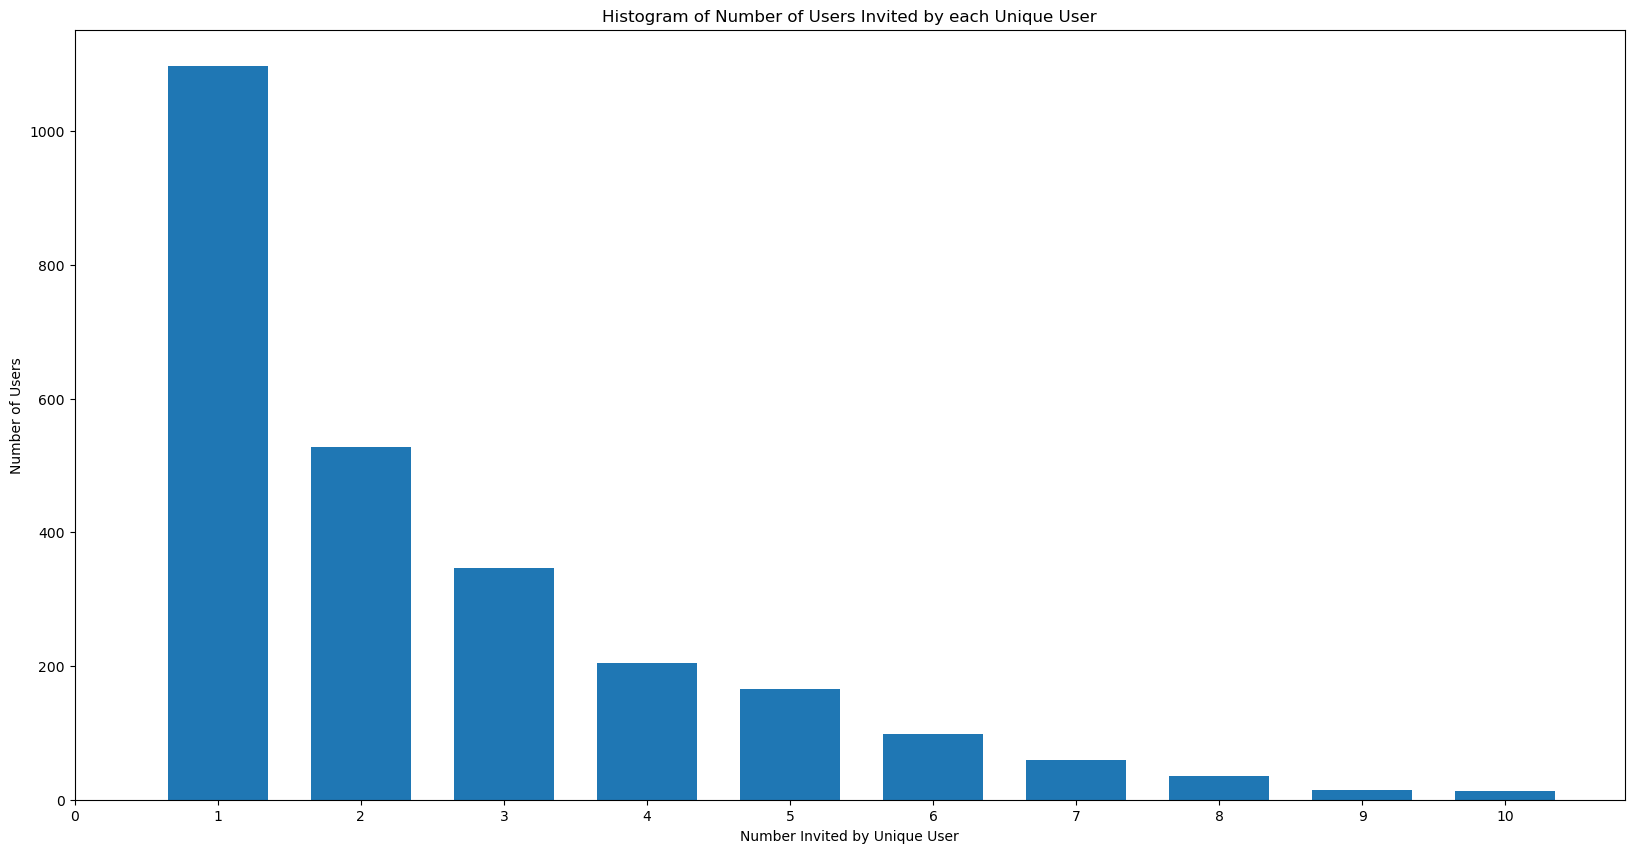

In [197]:

pd.set_option('display.max_rows', 100)
unique_invite_sums = takehome_users['invited_by_user_id'].value_counts()
plt.figure(figsize=(20,10))
plt.hist(unique_invite_sums, rwidth=0.7, bins=range(1, 12), align='left')
plt.xticks(range(0, 11))
plt.xlabel('Number Invited by Unique User')
plt.ylabel('Number of Users')
plt.title('Histogram of Number of Users Invited by each Unique User')


(0.0, 150.0)

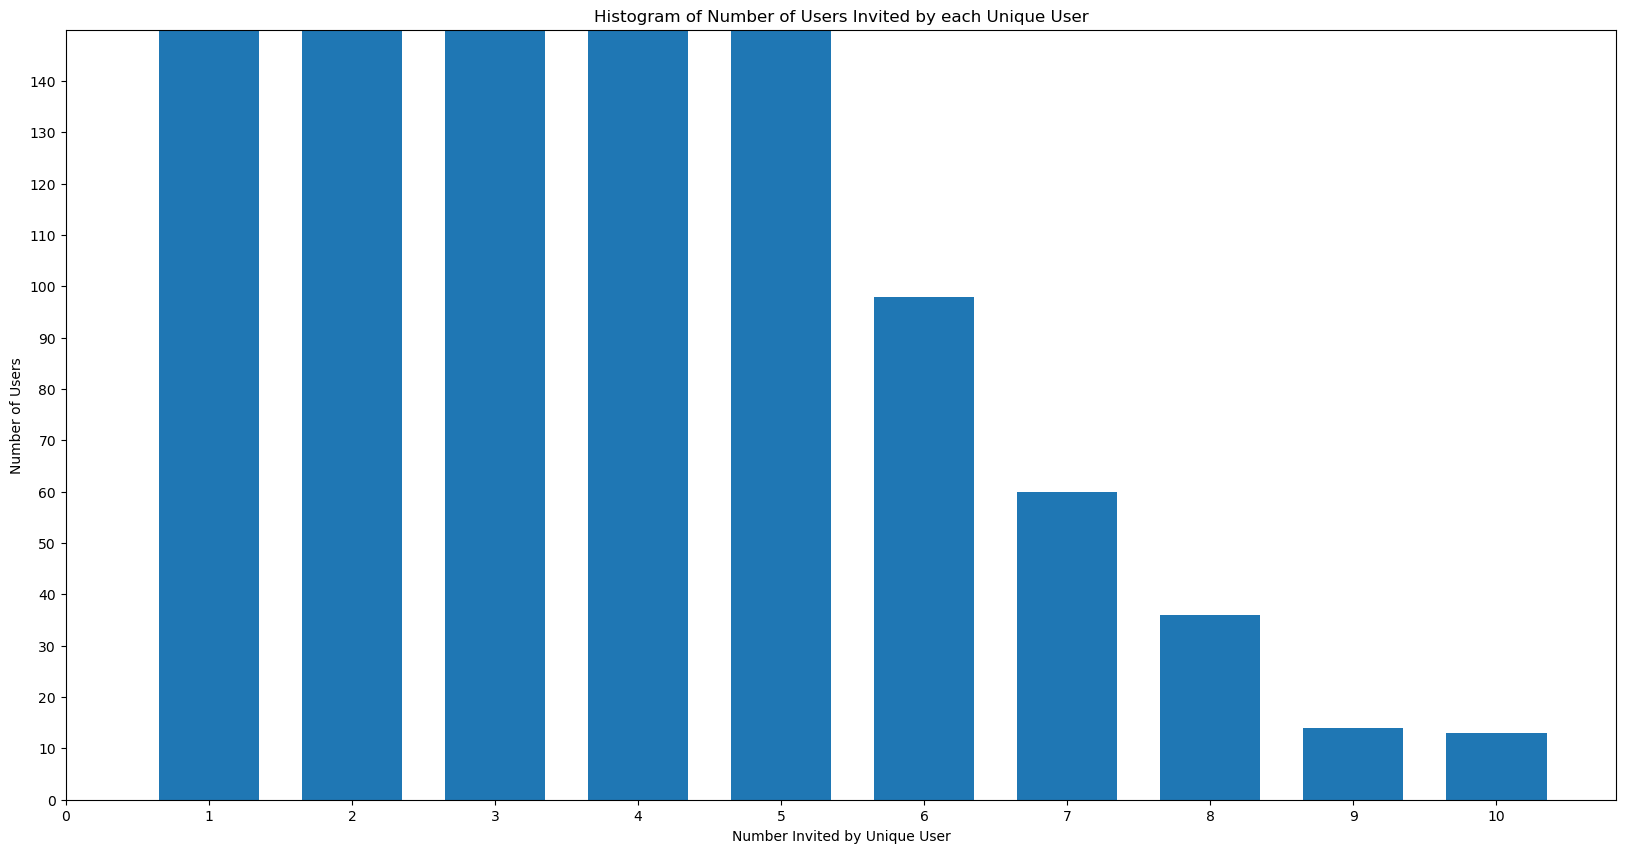

In [199]:
pd.set_option('display.max_rows', 100)
unique_invite_sums = takehome_users['invited_by_user_id'].value_counts()
plt.figure(figsize=(20,10))
plt.hist(unique_invite_sums, rwidth=0.7, bins=range(1, 12), align='left')
plt.xlabel('Number Invited by Unique User')
plt.xticks(range(0, 11))
plt.ylabel('Number of Users')
plt.yticks(range(0, 150, 10))
plt.title('Histogram of Number of Users Invited by each Unique User')
plt.ylim(0, 150)

In [23]:

creation_source_sums = takehome_users['creation_source'].value_counts()
print(creation_source_sums)

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64


In [25]:
takehome_users['opted_in_to_mailing_list'].sum()

2994

In [27]:
takehome_users['enabled_for_marketing_drip'].sum()

1792

In [29]:
print(takehome_users.columns)

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')


In [37]:
min_date = takehome_users['creation_time'].min()
max_date = takehome_users['creation_time'].max()
print("min_date:", min_date)
print("max_date:", max_date)

min_date: 2012-05-31 00:43:27
max_date: 2014-05-30 23:59:19


In [39]:
#OK we have data for a 2-year range. 
#We might want a sense of what changed with time
#This is most effectively accomplished with a sort function
#We could create a new dataframe sort by date and then we could rerun these stats in 6 month intervals



In [41]:
#We are now interested in taking a look at takehome_user_engagement that has 207,917 rows. 
#We want to see a histogram if the number of logins per user 
#We might want to convert these dataframes into a SQL database to better understand the relationship between the type of user and their login activity. 

Text(0.5, 1.0, 'Histogram of Number of logins per unique user (x values begin at displayed value and end at displayed value + 49)')

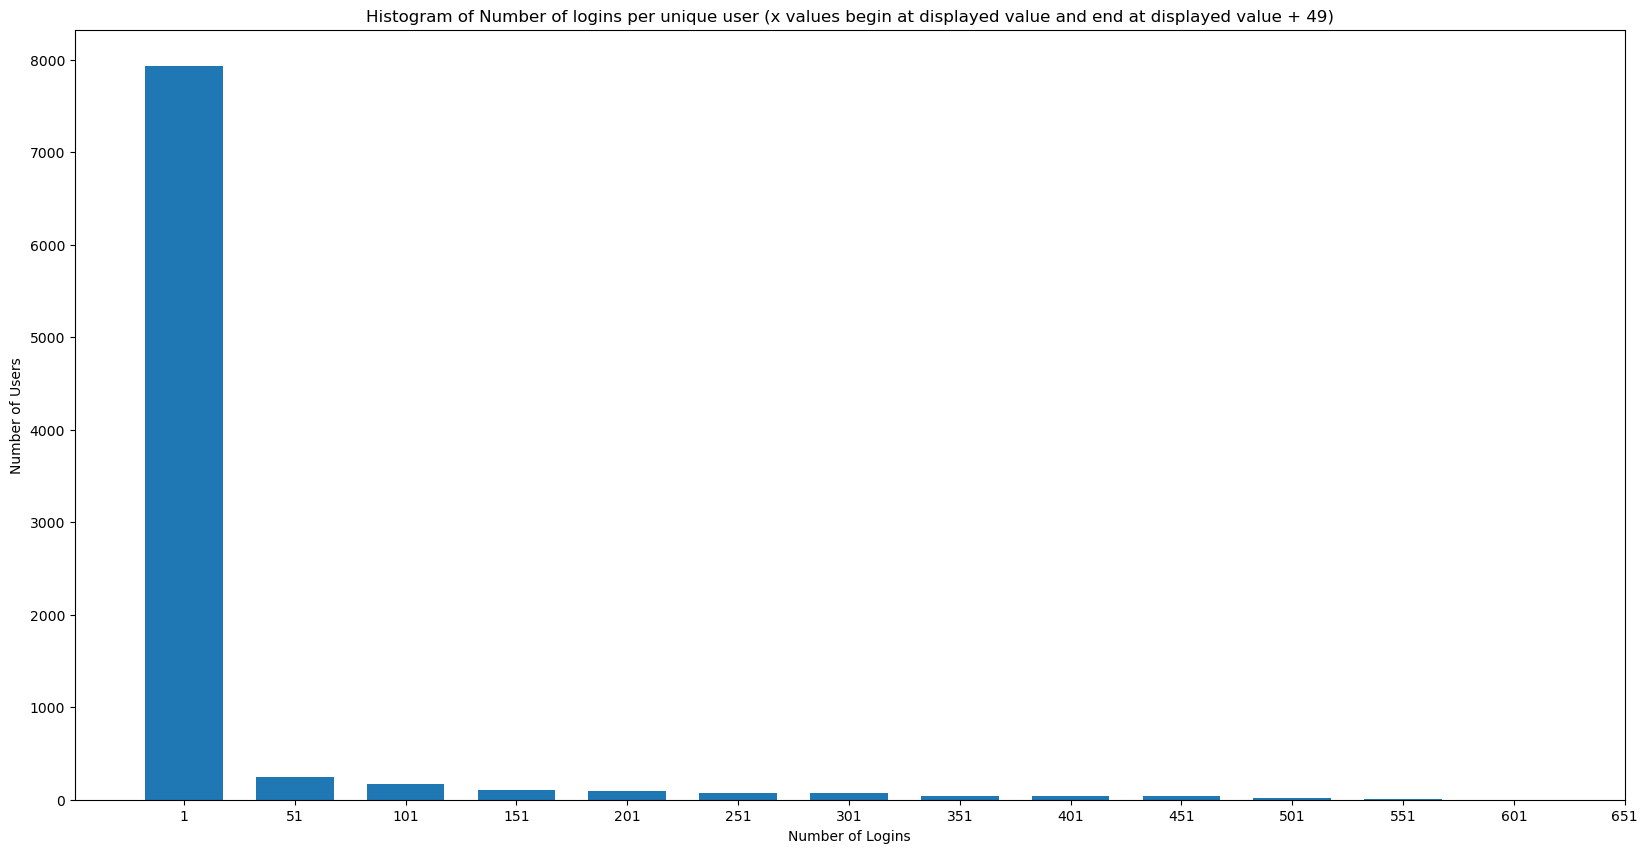

In [201]:
#Lets get a histogram of logins per user 
site_visit_sums = takehome_user_engagement['user_id'].value_counts()
plt.figure(figsize=(20,10))
bin_edges = range(1, 700, 50)
plt.hist(site_visit_sums, rwidth=0.7, bins=bin_edges, align='left')
plt.xlabel('Number of Logins')
plt.xticks(range(1, 700, 50))
plt.ylabel('Number of Users')
plt.title('Histogram of Number of logins per unique user (x values begin at displayed value and end at displayed value + 49)')

(0.0, 250.0)

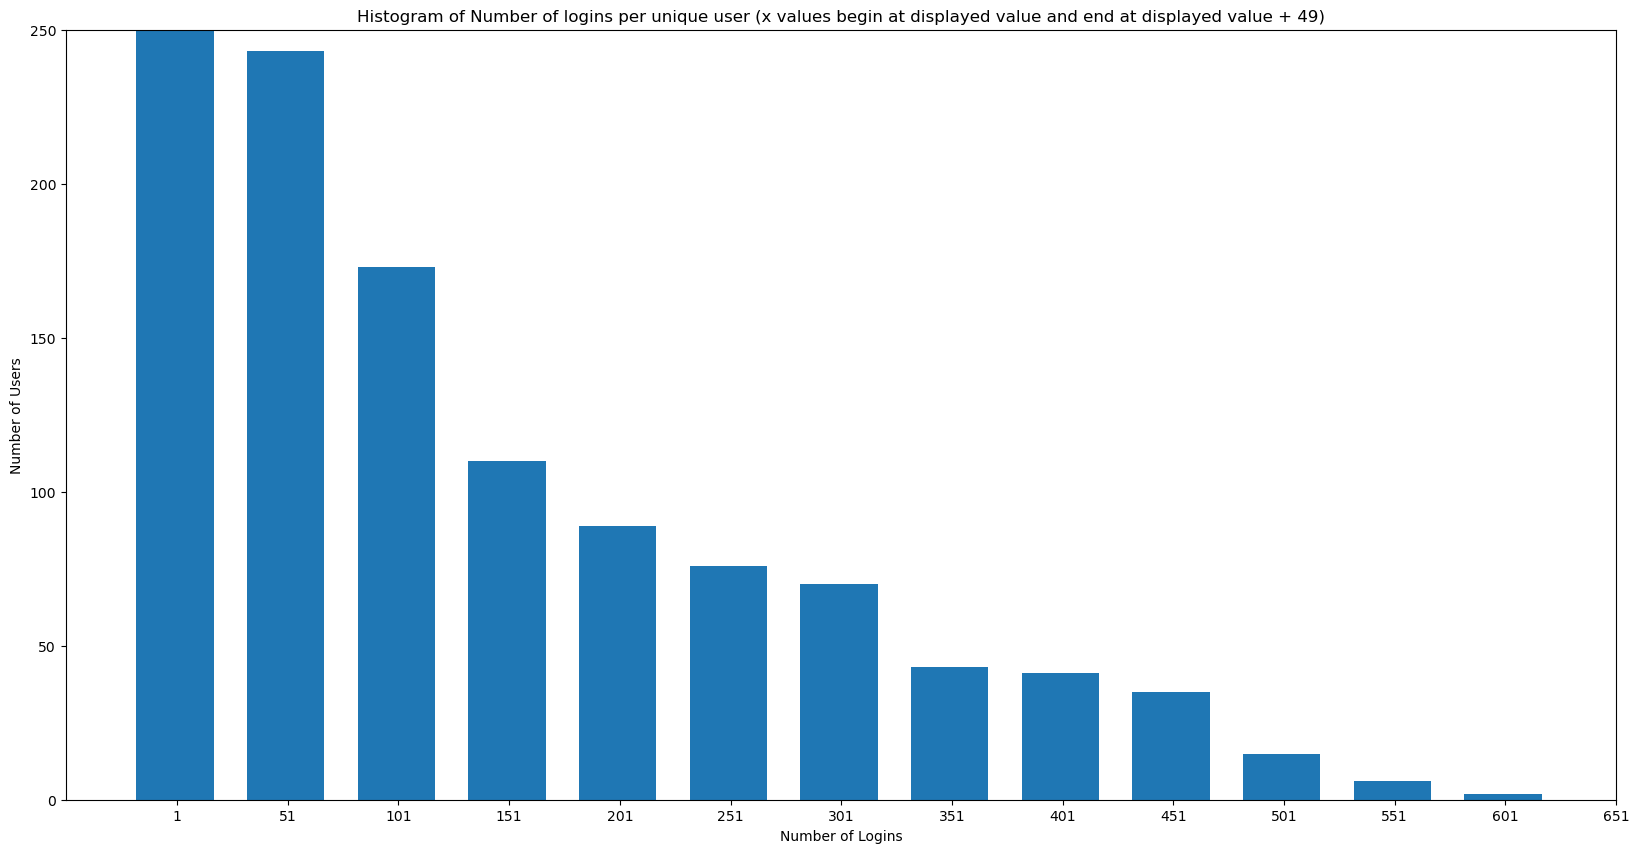

In [203]:
site_visit_sums = takehome_user_engagement['user_id'].value_counts()
plt.figure(figsize=(20,10))
bin_edges = range(0, 700, 50)
plt.hist(site_visit_sums, rwidth=0.7, bins=bin_edges, align='left')
plt.xlabel('Number of Logins')
plt.xticks(range(1, 700, 50))
plt.ylabel('Number of Users')
plt.title('Histogram of Number of logins per unique user (x values begin at displayed value and end at displayed value + 49)')
plt.ylim(0, 250)

In [47]:
min_date = takehome_user_engagement['time_stamp'].min()
max_date = takehome_user_engagement['time_stamp'].max()
print("min_date:", min_date)
print("max_date:", max_date)

min_date: 2012-05-31 08:20:06
max_date: 2014-06-06 14:58:50


In [49]:
unique_user_visits = takehome_user_engagement['user_id'].nunique()
print(unique_user_visits)

8823


In [51]:
print("Of the 12,000 users 8,823 have actually had a login so 3,177 never even logged in.")

Of the 12,000 users 8,823 have actually had a login so 3,177 never even logged in.


In [53]:
#Defining an "adopted user" as a user who has logged into the product on three separate
#days in at least one sevenday period , identify which factors predict future user adoption

In [55]:
#To answer this question first we convert out takehome_user_engagement dataframe into a dataframe organized with a date but no time column
#We check to see if there are missing days with no logins if there is we generate another dataframe with all dates and do an outer merge.  
#Then we to generate a for loop with a 7-day sliding window searching for a minimum of 3 logins for a single user_id
#We then append the results to a list 
#We may want to generate a second column in the list to record the date achieved
#We can use the sort function by user then date selecting only the first occurrence of the unique user and build a list from that.
#We can get the metrics of when the adoption actually occurred.
#We then isolate the users as a subset from the takehome_users dataframe using an inner merge function and finally we capture metrics on them

In [61]:
#Here we calculate the rolling 7 day sums by user per login  
takehome_user_engagement = (takehome_user_engagement.set_index('time_stamp').groupby('user_id')['user_id']\
  .rolling('7D')\
  .count()\
  .rename('count_past_7_days')\
  .reset_index()\
  .sort_values('time_stamp'))

In [63]:
takehome_user_engagement['time_stamp'] = pd.to_datetime(takehome_user_engagement['time_stamp'])
takehome_user_engagement['date'] = takehome_user_engagement['time_stamp'].dt.strftime('%Y-%m-%d')
takehome_user_engagement['date_criteria_met'] = takehome_user_engagement['time_stamp'].dt.strftime('%Y-%m-%d')

In [65]:
takehome_user_engagement.head(100)

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
178140,10012,2012-05-31 08:20:06,1.0,2012-05-31,2012-05-31
59486,3428,2012-05-31 15:47:36,1.0,2012-05-31,2012-05-31
175638,9899,2012-05-31 17:19:37,1.0,2012-05-31,2012-05-31
26821,1693,2012-05-31 21:58:33,1.0,2012-05-31,2012-05-31
109716,6102,2012-06-01 00:17:30,1.0,2012-06-01,2012-06-01
200931,11430,2012-06-01 01:42:31,1.0,2012-06-01,2012-06-01
32373,1995,2012-06-01 13:14:18,1.0,2012-06-01,2012-06-01
179759,10163,2012-06-01 14:30:38,1.0,2012-06-01,2012-06-01
140780,8068,2012-06-01 20:02:35,1.0,2012-06-01,2012-06-01
192393,10922,2012-06-01 21:49:51,1.0,2012-06-01,2012-06-01


In [67]:
takehome_user_engagement_sort1 = takehome_user_engagement.sort_values(by=['user_id', 'date'], ascending=[True, True])

In [69]:
takehome_user_engagement_sort1.head(100)

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
0,1,2014-04-22 03:53:30,1.0,2014-04-22,2014-04-22
1,2,2013-11-15 03:45:04,1.0,2013-11-15,2013-11-15
2,2,2013-11-29 03:45:04,1.0,2013-11-29,2013-11-29
3,2,2013-12-09 03:45:04,1.0,2013-12-09,2013-12-09
4,2,2013-12-25 03:45:04,1.0,2013-12-25,2013-12-25
5,2,2013-12-31 03:45:04,2.0,2013-12-31,2013-12-31
6,2,2014-01-08 03:45:04,1.0,2014-01-08,2014-01-08
7,2,2014-02-03 03:45:04,1.0,2014-02-03,2014-02-03
8,2,2014-02-08 03:45:04,2.0,2014-02-08,2014-02-08
9,2,2014-02-09 03:45:04,3.0,2014-02-09,2014-02-09


In [72]:
takehome_user_engagement_sort1_dd = takehome_user_engagement_sort1.drop_duplicates(subset=['user_id', 'date'])

In [74]:
takehome_user_engagement_sort1_dd.shape

(207917, 5)

In [76]:
#OK now our dataframe has the counts ou user_id logins for the past 7 days 
#We will now sort by count_past_7_days and drop occurances of less than 3
#Then we will sort by user_id and date and generate a new dataframe with the first occurrence of the user_id sorted by date

In [78]:
takehome_user_engagement_sort1 = takehome_user_engagement_sort1.sort_values(by='count_past_7_days')
takehome_user_engagement_subset = takehome_user_engagement_sort1[takehome_user_engagement_sort1['count_past_7_days'] >= 3]

In [80]:
takehome_user_engagement_subset.shape

(160522, 5)

In [82]:
takehome_user_engagement_subset.head()

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
73016,4184,2014-05-21 01:01:05,3.0,2014-05-21,2014-05-21
72965,4184,2013-12-19 01:01:05,3.0,2013-12-19,2013-12-19
73547,4206,2014-01-18 20:53:08,3.0,2014-01-18,2014-01-18
94611,5225,2012-10-23 19:48:18,3.0,2012-10-23,2012-10-23
10915,639,2013-01-11 04:57:57,3.0,2013-01-11,2013-01-11


In [84]:
takehome_user_engagement_subset_sort = takehome_user_engagement_subset.sort_values(by=['user_id', 'date'], ascending=[True, True])

In [86]:
takehome_user_engagement_subset_sort.head(100)

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
9,2,2014-02-09 03:45:04,3.0,2014-02-09,2014-02-09
10,2,2014-02-13 03:45:04,3.0,2014-02-13,2014-02-13
27,10,2013-02-19 22:08:03,3.0,2013-02-19,2013-02-19
30,10,2013-03-02 22:08:03,3.0,2013-03-02,2013-03-02
31,10,2013-03-05 22:08:03,3.0,2013-03-05,2013-03-05
35,10,2013-03-20 22:08:03,3.0,2013-03-20,2013-03-20
36,10,2013-03-22 22:08:03,3.0,2013-03-22,2013-03-22
37,10,2013-03-26 22:08:03,3.0,2013-03-26,2013-03-26
40,10,2013-04-13 22:08:03,3.0,2013-04-13,2013-04-13
41,10,2013-04-14 22:08:03,3.0,2013-04-14,2013-04-14


In [88]:
takehome_user_engagement_subset_sort_unique = takehome_user_engagement_subset_sort.drop_duplicates(subset=['user_id'])

In [90]:
takehome_user_engagement_subset_sort_unique.head(100)

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
9,2,2014-02-09 03:45:04,3.0,2014-02-09,2014-02-09
27,10,2013-02-19 22:08:03,3.0,2013-02-19,2013-02-19
312,20,2014-03-13 11:46:38,3.0,2014-03-13,2014-03-13
331,33,2014-03-23 06:29:09,3.0,2014-03-23,2014-03-23
354,42,2012-12-26 19:05:07,3.0,2012-12-26,2012-12-26
695,43,2013-03-11 07:13:17,3.0,2013-03-11,2013-03-11
718,50,2012-09-22 11:02:08,3.0,2012-09-22,2012-09-22
725,53,2013-02-17 23:47:15,3.0,2013-02-17,2013-02-17
753,63,2013-01-26 16:30:52,3.0,2013-01-26,2013-01-26
1118,69,2012-07-03 10:15:18,3.0,2012-07-03,2012-07-03


In [93]:
takehome_user_engagement_subset_sort_unique.shape

(1602, 5)

In [95]:
#OK so there are 1602 users that meet the criteria
#At this stage we want to see how the criteria was met over time

In [97]:
takehome_user_engagement_subset_sort_unique = takehome_user_engagement_subset_sort_unique.sort_values(by=['date'], ascending=[True])

In [99]:
takehome_user_engagement_subset_sort_unique.head(100)

,user_id,time_stamp,count_past_7_days,date,date_criteria_met
26824,1693,2012-06-10 21:58:33,3.0,2012-06-10,2012-06-10
11974,728,2012-06-16 16:04:36,3.0,2012-06-16,2012-06-16
204605,11764,2012-06-17 17:40:27,3.0,2012-06-17,2012-06-17
121041,6886,2012-06-18 13:46:16,3.0,2012-06-18,2012-06-18
87580,4835,2012-06-22 03:07:30,3.0,2012-06-22,2012-06-22
95844,5297,2012-06-24 17:32:09,3.0,2012-06-24,2012-06-24
110497,6171,2012-06-25 02:05:25,3.0,2012-06-25,2012-06-25
25531,1525,2012-06-25 23:10:18,3.0,2012-06-25,2012-06-25
161540,9312,2012-06-27 11:49:52,3.0,2012-06-27,2012-06-27
164475,9402,2012-06-27 13:23:57,3.0,2012-06-27,2012-06-27


<Axes: title={'center': 'Monthly Count Over Time'}, xlabel='Date', ylabel='Monthly Count'>

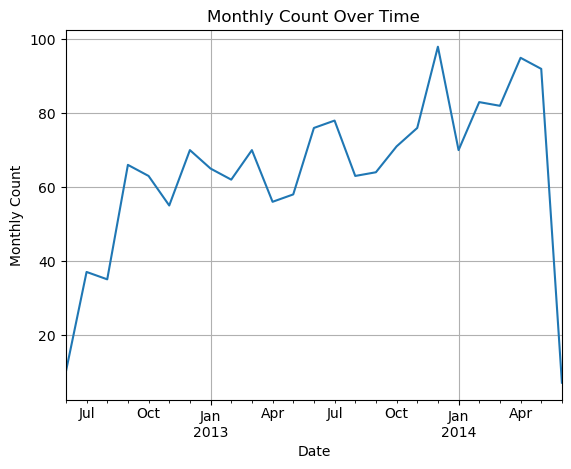

In [107]:
takehome_user_engagement_subset_sort_unique = takehome_user_engagement_subset_sort_unique.set_index('time_stamp')

Monthly_count = takehome_user_engagement_subset_sort_unique.resample('M').size()

Monthly_count.plot(title='Monthly Count Over Time', ylabel='Monthly Count', xlabel='Date', grid=True)

In [103]:
#Lets 

In [109]:
Monthly_count.head()

time_stamp
2012-06-30    10
2012-07-31    37
2012-08-31    35
2012-09-30    66
2012-10-31    63
Freq: ME, dtype: int64

In [111]:
#There is a steady increase in the number of users that meet the criteria overtime
#There appears to be a kind of spike up in users meeting the criteria every 3 or 4 months 
#There may be some external event that is triggering the additional users
#meeting the criteria as it would be unusual for such a pattern to consistently hold.

<Axes: title={'center': 'Weekly Count Over Time'}, xlabel='Date', ylabel='Weekly Count'>

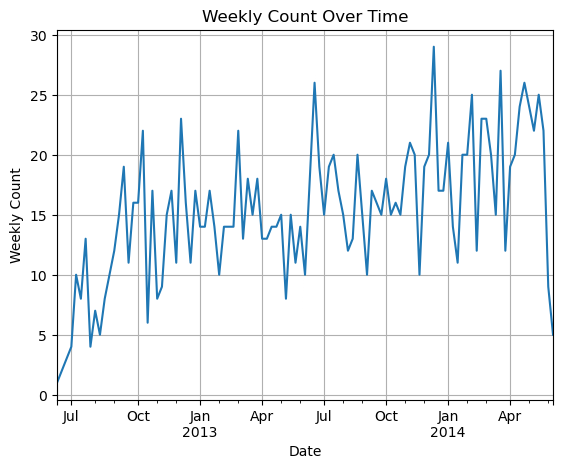

In [113]:
#Lets see a weekly resample
Weekly_count = takehome_user_engagement_subset_sort_unique.resample('W').size()

Weekly_count.plot(title='Weekly Count Over Time', ylabel='Weekly Count', xlabel='Date', grid=True)

In [115]:
print(type(Weekly_count))

<class 'pandas.core.series.Series'>


In [117]:
#Lets see the autocorrelation function

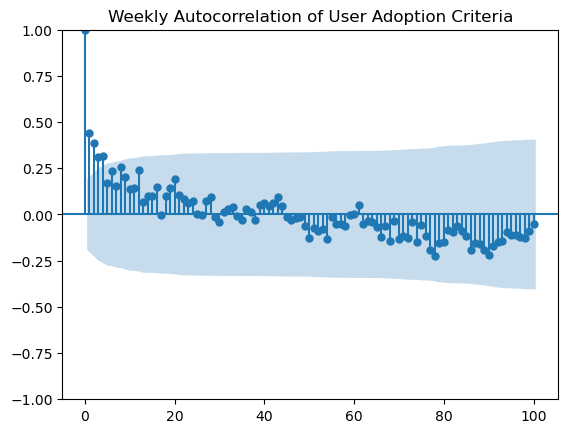

In [119]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(Weekly_count, lags=100, title='Weekly Autocorrelation of User Adoption Criteria')
plt.show()

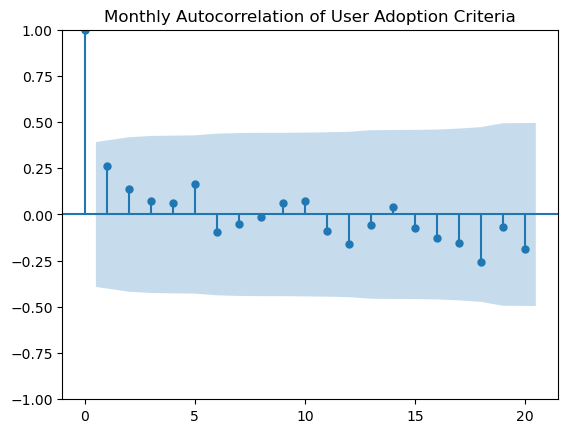

In [121]:
plot_acf(Monthly_count, lags=20, title='Monthly Autocorrelation of User Adoption Criteria')
plt.show()

In [123]:
#Peaks in users meeting the criteria are nearly always flanked with lower count periods


In [125]:
#OK Lets Proceed to merging our two dataframes with an inner join.
takehome_users_merged = pd.merge(takehome_user_engagement_subset_sort_unique, takehome_users, left_on='user_id', right_on='object_id', how='inner')
takehome_users_merged.head()

,user_id,count_past_7_days,date,date_criteria_met,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1693,3.0,2012-06-10,2012-06-10,1693,2012-05-31 21:58:33,Faulkner Hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,NaN
1,728,3.0,2012-06-16,2012-06-16,728,2012-06-11 16:04:36,Friedmann Klaus,KlausFriedmann@yahoo.com,PERSONAL_PROJECTS,1.401898e+09,0,0,46,NaN
2,11764,3.0,2012-06-17,2012-06-17,11764,2012-06-10 17:40:27,Lambert Louis,LouisLambert@gmail.com,SIGNUP,1.358876e+09,0,0,199,NaN
3,6886,3.0,2012-06-18,2012-06-18,6886,2012-06-12 13:46:16,Jackson Homer,HomerRJackson@jourrapide.com,PERSONAL_PROJECTS,1.341582e+09,0,0,232,NaN
4,4835,3.0,2012-06-22,2012-06-22,4835,2012-06-17 03:07:30,Lloyd Cerys,CerysLloyd@jourrapide.com,SIGNUP,1.401851e+09,1,0,251,NaN


In [127]:
takehome_users_merged.shape

(1602, 14)

In [129]:
merged_creation_source_sums = takehome_users_merged['creation_source'].value_counts()
print(merged_creation_source_sums)

creation_source
ORG_INVITE            553
GUEST_INVITE          360
SIGNUP                293
SIGNUP_GOOGLE_AUTH    232
PERSONAL_PROJECTS     164
Name: count, dtype: int64


In [131]:
creation_source_sums = takehome_users['creation_source'].value_counts()
print(creation_source_sums)

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64


In [133]:
creation_source_sums.head()

creation_source
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: count, dtype: int64

In [135]:
Creation_Source_Ratios = merged_creation_source_sums/creation_source_sums
Creation_Source_Ratios.head()

creation_source
GUEST_INVITE          0.166436
ORG_INVITE            0.129995
PERSONAL_PROJECTS     0.077688
SIGNUP                0.140393
SIGNUP_GOOGLE_AUTH    0.167509
Name: count, dtype: float64

In [ ]:
#Personal Projects as creation source has a lower percentage of users that become adopeted
#Guest invite is more influencing on users becoming adopted than organization invite
#Google authenticated sign up has an equal percentage of users that become adopted as guest invite
#athough, we have not looked at number of logins per user type.

In [141]:
#Lets check to see if there is a relationship between creation_date and date where date is the date where the criteria is met
takehome_users_merged['creation_time'] = pd.to_datetime(takehome_users_merged['creation_time'])
takehome_users_merged['creation_date'] = takehome_users_merged['creation_time'].dt.strftime('%Y-%m-%d')

In [145]:
takehome_users_merged.head()

,user_id,count_past_7_days,date,date_criteria_met,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_date
0,1693,3.0,2012-06-10,2012-06-10,1693,2012-05-31 21:58:33,Faulkner Hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,NaN,2012-05-31
1,728,3.0,2012-06-16,2012-06-16,728,2012-06-11 16:04:36,Friedmann Klaus,KlausFriedmann@yahoo.com,PERSONAL_PROJECTS,1.401898e+09,0,0,46,NaN,2012-06-11
2,11764,3.0,2012-06-17,2012-06-17,11764,2012-06-10 17:40:27,Lambert Louis,LouisLambert@gmail.com,SIGNUP,1.358876e+09,0,0,199,NaN,2012-06-10
3,6886,3.0,2012-06-18,2012-06-18,6886,2012-06-12 13:46:16,Jackson Homer,HomerRJackson@jourrapide.com,PERSONAL_PROJECTS,1.341582e+09,0,0,232,NaN,2012-06-12
4,4835,3.0,2012-06-22,2012-06-22,4835,2012-06-17 03:07:30,Lloyd Cerys,CerysLloyd@jourrapide.com,SIGNUP,1.401851e+09,1,0,251,NaN,2012-06-17


In [147]:
takehome_users_merged['creation_date'] = pd.to_datetime(takehome_users_merged['creation_date'])
takehome_users_merged['date_criteria_met'] = pd.to_datetime(takehome_users_merged['date_criteria_met'])

In [151]:
takehome_users_merged['time_to_meeting_criteria'] = takehome_users_merged['date_criteria_met'] - takehome_users_merged['creation_date']

In [153]:
takehome_users_merged.head()

,user_id,count_past_7_days,date,date_criteria_met,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_date,time_to_meeting_criteria
0,1693,3.0,2012-06-10,2012-06-10,1693,2012-05-31 21:58:33,Faulkner Hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,1.399932e+09,0,1,50,NaN,2012-05-31,10 days
1,728,3.0,2012-06-16,2012-06-16,728,2012-06-11 16:04:36,Friedmann Klaus,KlausFriedmann@yahoo.com,PERSONAL_PROJECTS,1.401898e+09,0,0,46,NaN,2012-06-11,5 days
2,11764,3.0,2012-06-17,2012-06-17,11764,2012-06-10 17:40:27,Lambert Louis,LouisLambert@gmail.com,SIGNUP,1.358876e+09,0,0,199,NaN,2012-06-10,7 days
3,6886,3.0,2012-06-18,2012-06-18,6886,2012-06-12 13:46:16,Jackson Homer,HomerRJackson@jourrapide.com,PERSONAL_PROJECTS,1.341582e+09,0,0,232,NaN,2012-06-12,6 days
4,4835,3.0,2012-06-22,2012-06-22,4835,2012-06-17 03:07:30,Lloyd Cerys,CerysLloyd@jourrapide.com,SIGNUP,1.401851e+09,1,0,251,NaN,2012-06-17,5 days


In [161]:
takehome_users_merged = takehome_users_merged.sort_values(by=['time_to_meeting_criteria'], ascending=[True])
takehome_users_merged.head(10)

,user_id,count_past_7_days,date,date_criteria_met,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_date,time_to_meeting_criteria
1412,5832,3.0,2014-04-02,2014-04-02,5832,2014-03-31 19:49:10,McCarten Joseph,JosephMcCarten@hotmail.com,ORG_INVITE,1.401047e+09,0,0,129,2042.0,2014-03-31,2 days
889,3915,3.0,2013-09-14,2013-09-14,3915,2013-09-12 08:39:26,Seabrook Claire,ClaireSeabrook@hotmail.com,ORG_INVITE,1.400662e+09,1,1,185,9691.0,2013-09-12,2 days
58,7210,3.0,2012-08-14,2012-08-14,7210,2012-08-12 19:17:15,Herzog Benjamin,BenjaminHerzog@gustr.com,ORG_INVITE,1.401909e+09,0,1,243,7210.0,2012-08-12,2 days
1405,5127,3.0,2014-03-30,2014-03-30,5127,2014-03-28 21:07:24,McDowell Olivia,ltlzpyco@nxydr.com,ORG_INVITE,1.400534e+09,0,0,81,3208.0,2014-03-28,2 days
65,2610,3.0,2012-08-20,2012-08-20,2610,2012-08-18 23:29:20,Davis Stephanie,StephanieJDavis@yahoo.com,ORG_INVITE,1.359589e+09,0,0,5,11532.0,2012-08-18,2 days
159,6637,3.0,2012-10-05,2012-10-05,6637,2012-10-03 17:32:39,Luffman Abby,AbbyLuffman@cuvox.de,ORG_INVITE,1.369762e+09,0,0,294,1316.0,2012-10-03,2 days
40,6050,3.0,2012-07-22,2012-07-22,6050,2012-07-20 10:06:26,Kuefer Daniela,DanielaKuefer@cuvox.de,GUEST_INVITE,1.400667e+09,0,0,95,8399.0,2012-07-20,2 days
651,11969,3.0,2013-06-03,2013-06-03,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0,2013-06-01,2 days
1476,10355,3.0,2014-04-22,2014-04-22,10355,2014-04-20 23:28:16,Weidner William,tomtkrfw@xvogn.com,GUEST_INVITE,1.401579e+09,0,0,226,1551.0,2014-04-20,2 days
1448,4902,3.0,2014-04-14,2014-04-14,4902,2014-04-12 21:24:19,Morris Julia,JuliaHMorris@jourrapide.com,SIGNUP,1.401485e+09,0,0,34,NaN,2014-04-12,2 days


Text(0.5, 1.0, 'Histogram of Days From and Including Creation Date to Meeting Criteria')

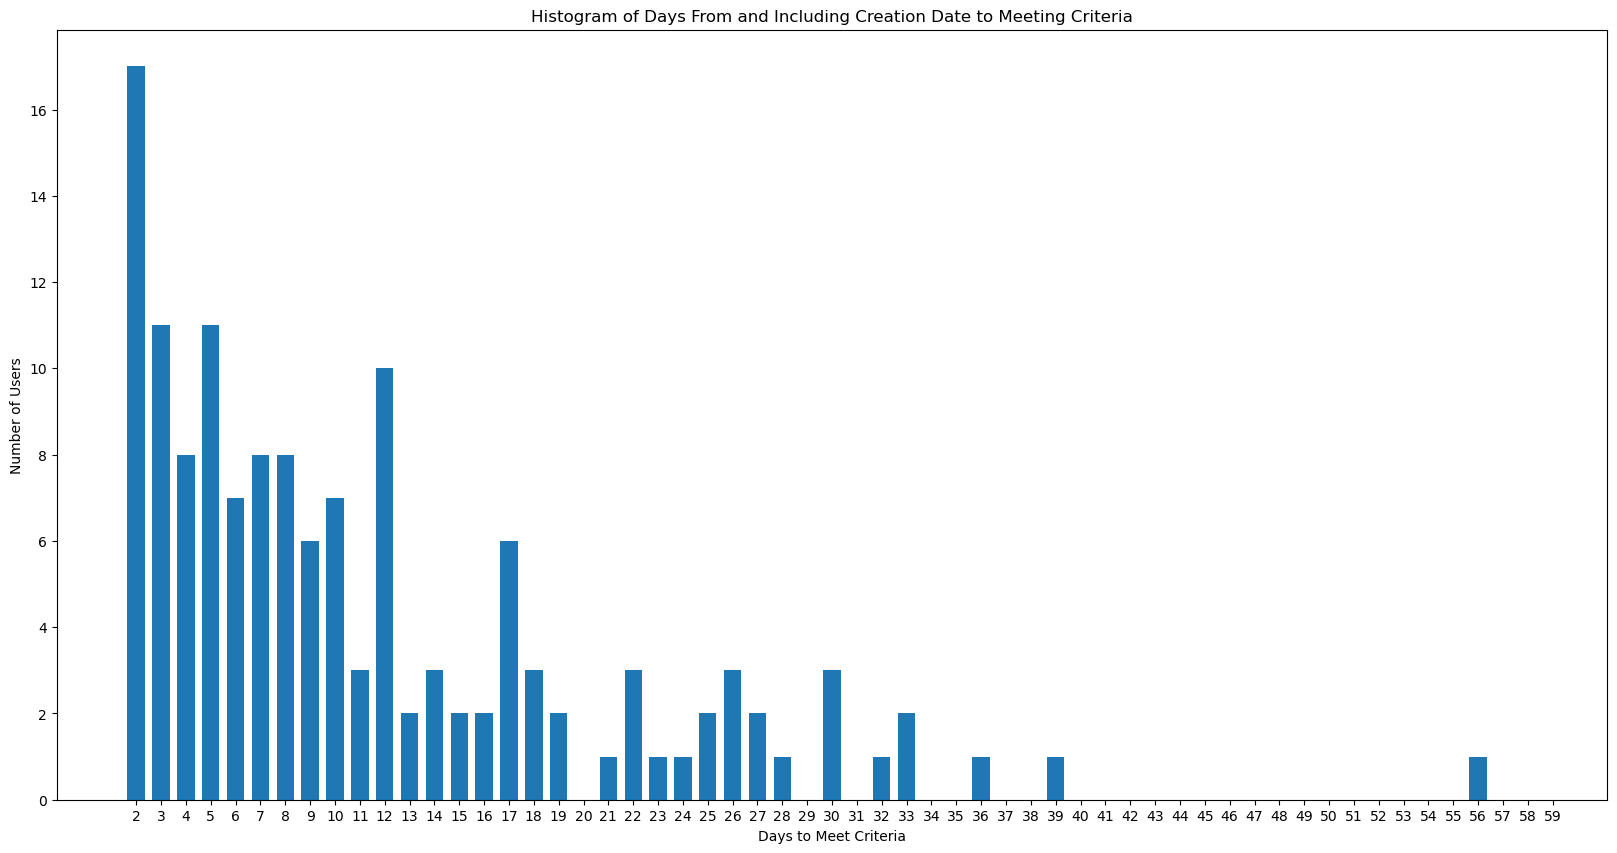

In [191]:
Criteria_meet_time = takehome_users_merged['time_to_meeting_criteria'].value_counts()
plt.figure(figsize=(20,10))
bin_edges = range(2, 60, 1)
plt.hist(Criteria_meet_time, rwidth=0.7, bins=bin_edges, align='left')
plt.xlabel('Days to Meet Criteria')
plt.xticks(range(2, 60, 1))
plt.ylabel('Number of Users')
plt.title('Histogram of Days From and Including Creation Date to Meeting Criteria')

In [ ]:
#Most users who adopt use of the website do so generally with in 12 days. 